# Game of Thrones
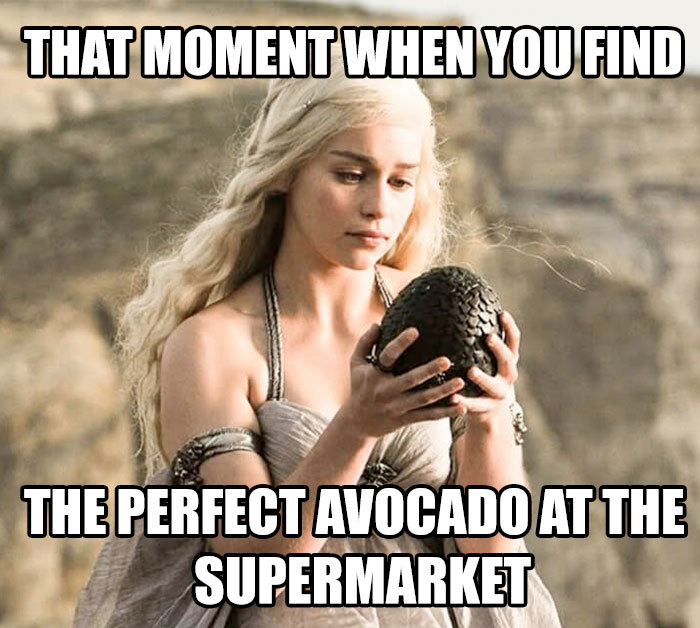

## Screen-time analysis

Teraz sa budeme hrat s datasetom, ktory obsahuje zaznamy o case, v ktorom boli postavy postavy GoT v zavere, za jednotlive serie.

K dispozicii mame nasledujuce subory:
- `../data/GoT_actors.csv` - Cas postav v hodinach po sezonach
- `../data/GoT_house.csv` - Cas rodin v hodinach po sezonach

**1. Importovanie kniznice**

Importuj kniznicu `pandas` s aliasom `pd`.
Importuj kniznicu `numpy` s aliasom `np`.

In [ ]:
# Tvoj kod

import pandas as pd
import numpy as np

**2. Nacitanie suboru s postavami**

Vytvor DataFrame z hodnot v subore `../data/GoT_actors.csv`.

Moje otazky

- Ako vyzera tabulka? 
- Kolko ma stlpcov a riadkov? 
- Obsahuje nejake nulove riadky?

In [ ]:
# Tvoj kod

df = pd.read_csv('../data/GoT_actors.csv')

df.info()
df.columns

df.head()

**3. Vytvor index zo stlpca `actor`**

In [ ]:
df = df.set_index(['actor'])
df.index.name = None
df.head()

In [ ]:
df.index.name = None

**4. Kto bol najcastejsie na obrazovkach napriec celou seriou?**

Potrebujeme spocitat udaje v stlpcoch `season 1` az `season 7`.
Pandas nam na tieto ucely poskytuje metodu [df.sum()](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.sum.html).

Defaultne spravanie ale je, ze hodnoty zratava po riadkoch a nie po stlpcoch. Preto potrebujeme pomocou parametra `axis` povedat, v akom smere chceme data scitat.

Z dokumentacie sa docitame, ze `axis` moze nadobudat nasledujuce hodnoty:

- `0` pre scitavanie po riadkoch
- `1` pre scitavanie po stlpcoch

Porovnaj rozdiely vystupov, pre rozne hodnoty `axis`.

Potom musis vysledok este zoradit podla velkosti pomocou metody [df.sort_values()](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.sort_values.html).

In [ ]:
# Tvoj kod ide sem
df.sum(axis=0)

df.sum(axis=1).sort_values(ascending=False)

**5. Pomocou jedneho prikazu vyber zaznamy pre nizsie uvedene postavy**

- Jaime Lannister
- Lord Varys 
- Tyrion Lannister
- Daenerys Targaryen 
- Jon Snow

Na vyberanie dat na zakade hodnot indexov, sluzi metoda [df.loc()](http://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.loc.html).

In [ ]:
# Tvoj kod
actors = [
    'Jaime Lannister',
    'Lord Varys',
    'Tyrion Lannister',
    'Daenerys Targaryen',
    'Jon Snow'
]

df.loc[actors]

**6. Kto bol najviac na obrazovke v 3. serii?**

Opat pouzijeme metodu [df.loc()](http://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.loc.html), teraz vsak nevyberame na zaklade riadku ale na zaklade stlpca. Vybrane data nasledne musime zoradit a vypisat riadky z najvacsimy hodnotami.

In [ ]:
# Tvoj kod ide sem
df.loc[:, ['season 3']].sort_values(ascending=False,by='season 3').head()

**7. Aky je priemerny cas postav na obrazovke v 5. serii?**

Na vypocit pouzi metodu [df.mean()](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.mean.html). Predtym ale vyber spravne data z tabulky.

Pomocou metody [df.replace()] premen nulove hodnoty na `NaN` a az na zaklade tycho vysledkov vypocitaj priemer.

In [ ]:
# Tvoj kod
df.loc[:, ['season 5']].replace(0, np.NaN).mean()

**8. Ako sa vyvyjal screen-time pre charakter Jon Snow?**

Najprv zober data iba pre spravny charakter. Potom pomocou metody [df.plot()](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.plot.html) vykresli stlpcovy graf nad danym datasetom.

In [ ]:
# Tvoj kod
df.loc[['Jon Snow']].plot(kind='bar')

**9. Porovnaj screen-time nizsie uvedenych charakterov pomocou grafu**

- Sansa Stark
- Daenerys Targaryen

Implementacia je uplne rovnaka ako ako v ulohe 8., potrebujes iba rozsirit vyber postav.

In [ ]:
df.loc[['Sansa Stark', 'Daenerys Targaryen']].plot(kind='bar')

**10. Na zaver este rychlo porovnajme rodiny**

1. Nacitaj do premennej `df` subor `../data/GoT/screentime/GoT_house.csv`
2. Ake su stlpce? Ake su riadky? Je treba spravit index?
3. Aka je najspominanejsia rodina napriec vsetkymi seriami?
4. Ukazes rozlozenie screen-time rodin v kolacovom grafe?

In [ ]:
df = pd.read_csv('../data/GoT_house.csv')

df = df.set_index(['house'])

df = df.groupby(['house']).sum()

df.sum(axis=1).sort_values(ascending=False).plot(kind='pie')